In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Fetch Bitcoin historical data
btc_df = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')

# Preprocessing
btc_df['Date'] = btc_df.index
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df.set_index('Date', inplace=True)


[*********************100%***********************]  1 of 1 completed


In [21]:
# Feature engineering
btc_df['Close_Lag_1'] = btc_df['Close'].shift(1)
btc_df['MA10'] = btc_df['Close'].rolling(window=10).mean()
btc_df['MA50'] = btc_df['Close'].rolling(window=50).mean()
btc_df.dropna(inplace=True)

# Prepare data
features = ['Close_Lag_1', 'MA10', 'MA50']
X = btc_df[features]
y = btc_df['Close']


In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Model training (Baseline: Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [24]:
# Model training (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [25]:
# Model training (XGBoost)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [27]:
# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R2 Score: {r2_lr}')
print(f'Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R2 Score: {r2_rf}')
print(f'XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R2 Score: {r2_xgb}')

Linear Regression - MAE: 423.3917026552003, RMSE: 642.2938081206319, R2 Score: 0.9846773339775376
Random Forest - MAE: 954.132953083591, RMSE: 1240.5134939717466, R2 Score: 0.9428429441095773
XGBoost - MAE: 1414.6104736328125, RMSE: 1826.2524469525017, R2 Score: 0.8761236071586609


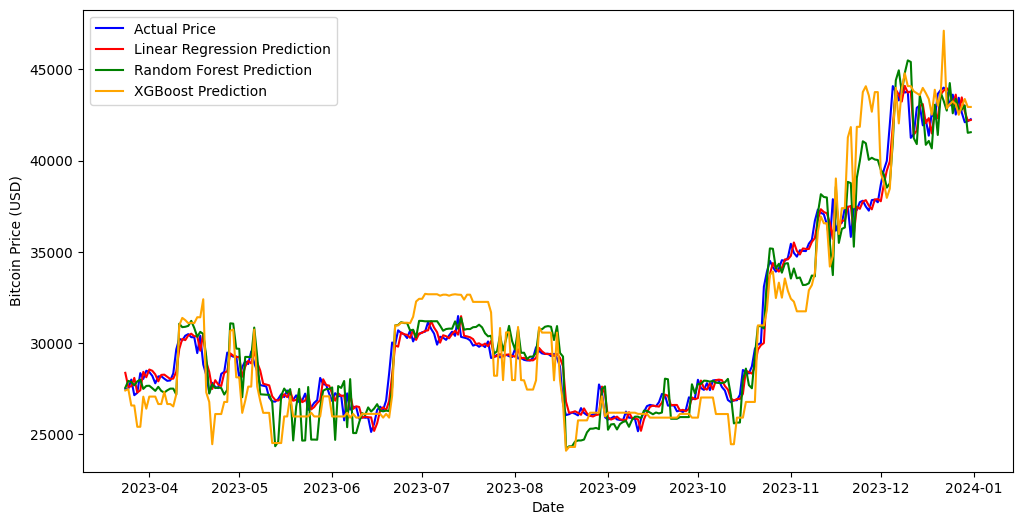

In [28]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression Prediction', color='red')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Prediction', color='green')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


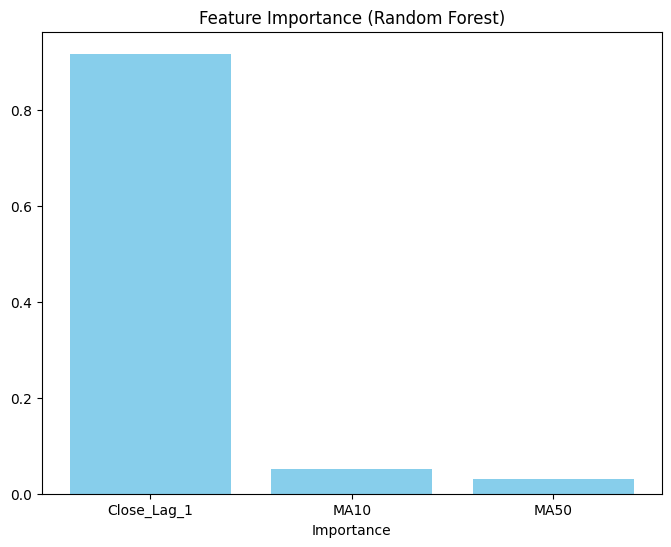

In [29]:
# Plot feature importance for Random Forest
feature_importances_rf = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances_rf, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


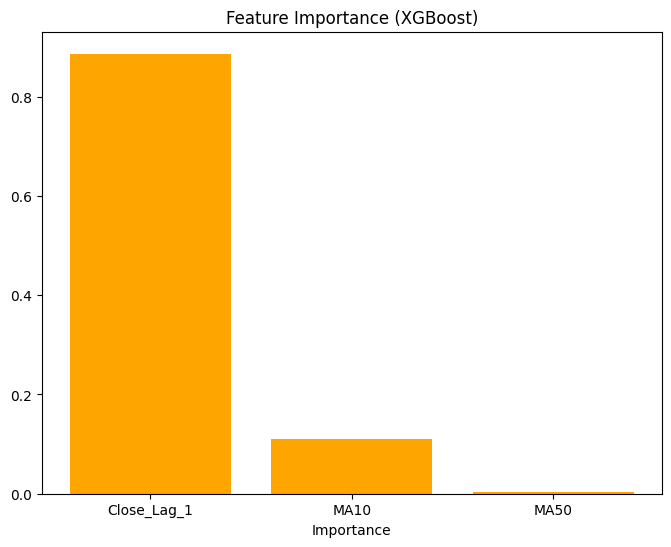

In [30]:
# Plot feature importance for XGBoost
feature_importances_xgb = xgb_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances_xgb, color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()


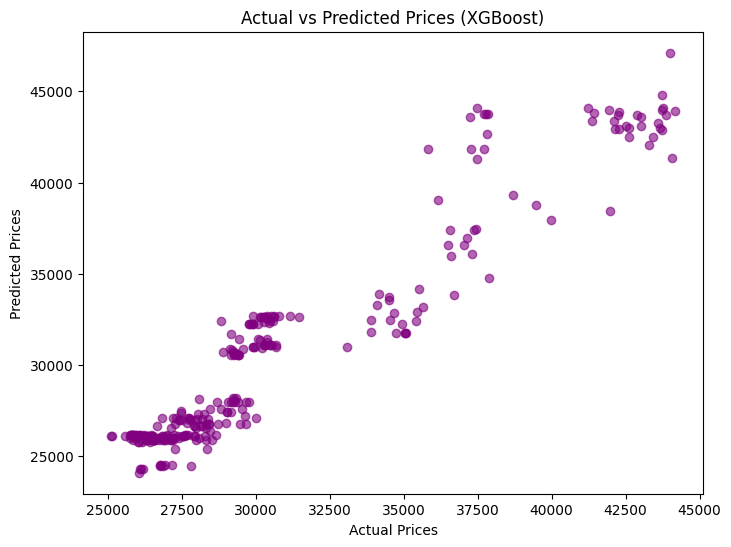

In [31]:
# Plot actual vs predicted prices (scatter for XGBoost)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.show()
